In [25]:
# load packages
import numpy as np
import matplotlib.pyplot as plt

# this code will compute the net value of an individual who either
#   1. purchases their vehicle outright, or
#
#   2. finances their vehicle, invests the remainder in the market, and withdraws monthly payments from the investment account

In [26]:
#%% INPUTS (modify these values as you wish)

# vehicle financing terms
T  = 8         # time period in years
X0 = 50000     # initial car value
Y  = 10000      # down payment on car
i  = 0.065     # annual interest rate on car loan as a fraction

# investment terms
j = 0.10    # expected annual rate of return on investment

# vehicle depreciation
k = -0.10                 # annual value rate of car

In [27]:
#%% scenario #1: finance car, invest remainder (do not modify)

# calculate monthly payment
Z0   = X0 - Y    # loan amount
time = np.arange(1/12,T+.01,1/12)
N    = 12*time   # no. of monthly payments made at time t
P    = Z0 * i/12 / (1-(1+i/12)**(-np.max(N)))    # monthly payment

# investment
Z_finance = Z0 * (1+j)**time - P*((1+j/12)**(12*time) - 1)/(j/12)

# car value
V = X0 * (1+k)**time      # car value in time

# loan balance
B = P*(1-(1+i/12)**-(np.max(N) - N)) / (i/12)    # loan balance

# car equity
E_finance = V - B

# net worth
M_finance = Z_finance + E_finance

In [28]:
#%% scenario #2 (purchase the car outright, no investment) (do not modify)

E_purchase = V

M_purchase = E_purchase

Text(2.5, -0.2, 'initial investment=        $40000')

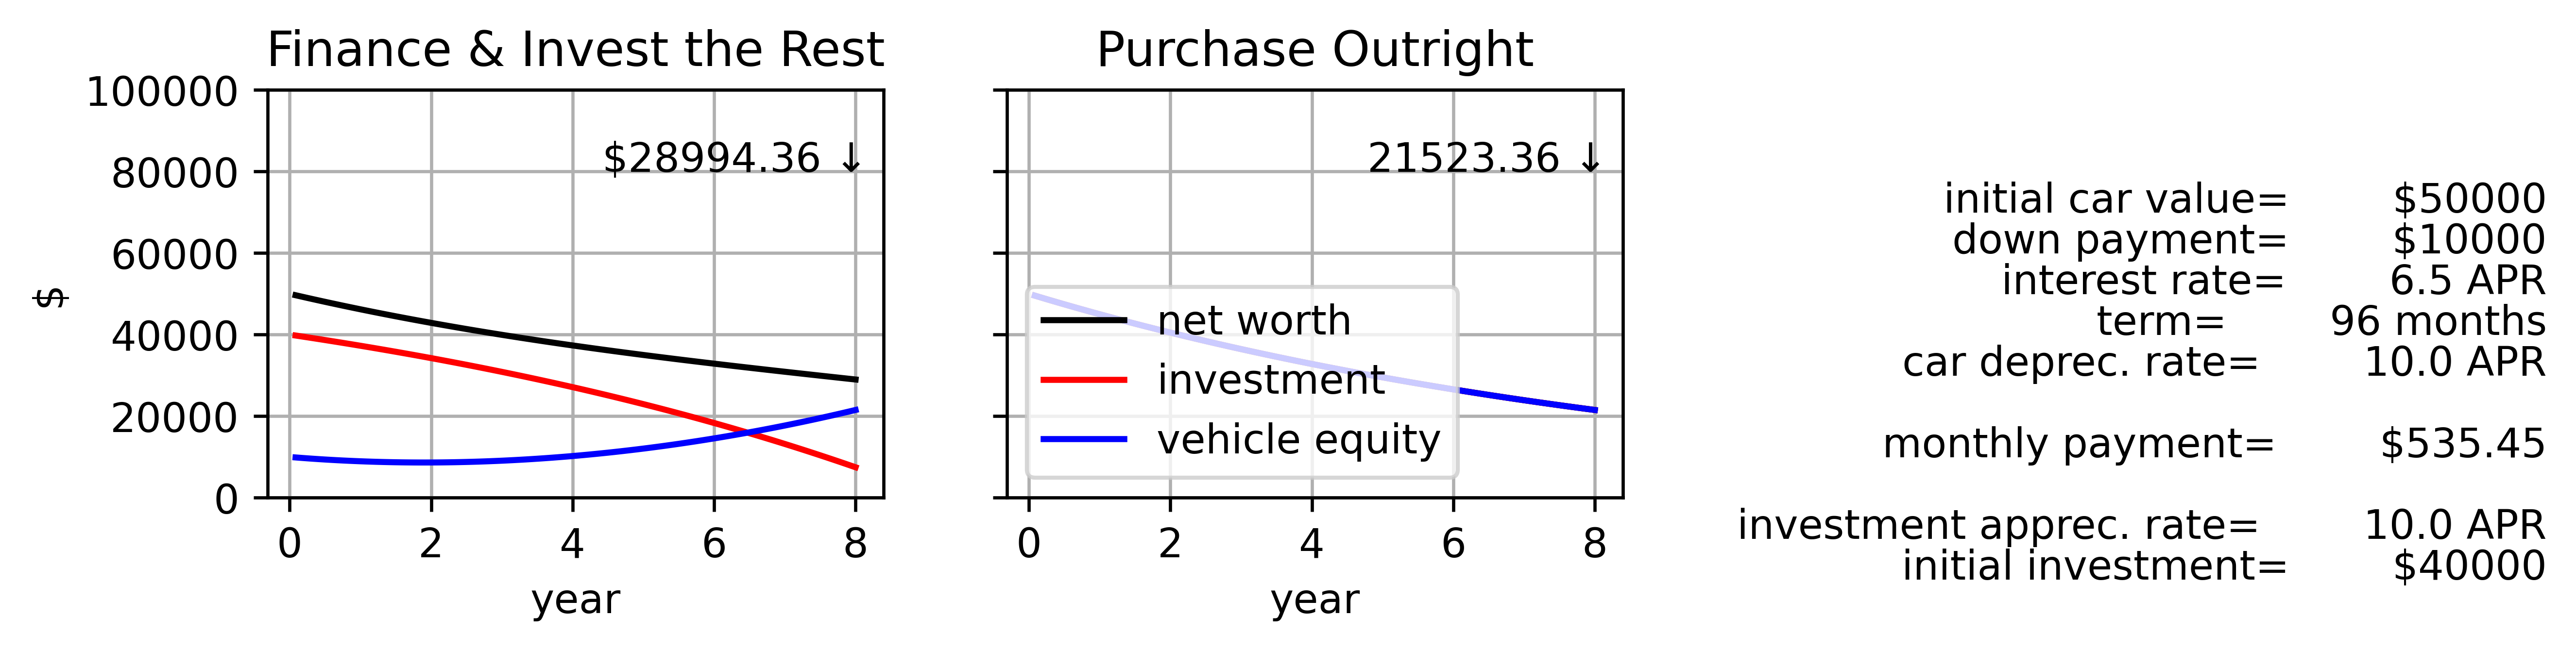

In [34]:
#%% plot

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
fig = plt.figure(figsize=(6,4))   # initialize figure
plt.rcParams.update({'font.size': 10})

plt.subplot(2,2,1)
plt.plot(time, M_finance, color='black', label='net worth')
plt.plot(time, Z_finance, color='red', label='investment')
plt.plot(time, E_finance, color='blue', label='vehicle equity')
# plt.ylim([0,5.e4])
plt.ylim([0,1.e5])
plt.ylabel('$')
plt.xlabel('year')
plt.grid('on')
plt.title('Finance & Invest the Rest')
plt.annotate('$%.2f \u2193' % (M_finance[-1]), color='black', xy=(0.975, .8), xycoords='axes fraction', horizontalalignment='right')

ax=plt.subplot(2,2,2)
plt.plot(time, M_purchase, color='black', label='net worth')
plt.plot(time, M_purchase, color='red', label='investment')
plt.plot(time, E_purchase, color='blue', label='vehicle equity')
# plt.ylim([0,5.e4])
plt.ylim([0,1.e5])
ax.set_yticklabels([])
plt.xlabel('year')
plt.grid('on')
plt.legend(loc='lower left')
plt.title('Purchase Outright')
plt.annotate('%.2f \u2193' % (M_purchase[-1]), color='black', xy=(0.975, .8), xycoords='axes fraction', horizontalalignment='right')

# annotations
plt.annotate('initial car value=        $%.0f' % (X0), color='black', xy=(2.5, .70), xycoords='axes fraction', horizontalalignment='right')
plt.annotate('down payment=        $%.0f' % (Y), color='black', xy=(2.5, .6), xycoords='axes fraction', horizontalalignment='right')
plt.annotate('interest rate=        %.1f APR' % (100*i), color='black', xy=(2.5, .5), xycoords='axes fraction', horizontalalignment='right')
plt.annotate('term=        %.0f months' % (np.max(N)), color='black', xy=(2.5, .4), xycoords='axes fraction', horizontalalignment='right')
plt.annotate('car deprec. rate=        %.1f APR' % (-100*k), color='black', xy=(2.5, .3), xycoords='axes fraction', horizontalalignment='right')

plt.annotate('monthly payment=        $%.2f' % (P), color='black', xy=(2.5, .1), xycoords='axes fraction', horizontalalignment='right')


plt.annotate('investment apprec. rate=        %.1f APR' % (100*j), color='black', xy=(2.5, -.1), xycoords='axes fraction', horizontalalignment='right')
plt.annotate('initial investment=        $%.0f' % (Z0), color='black', xy=(2.5, -.2), xycoords='axes fraction', horizontalalignment='right')


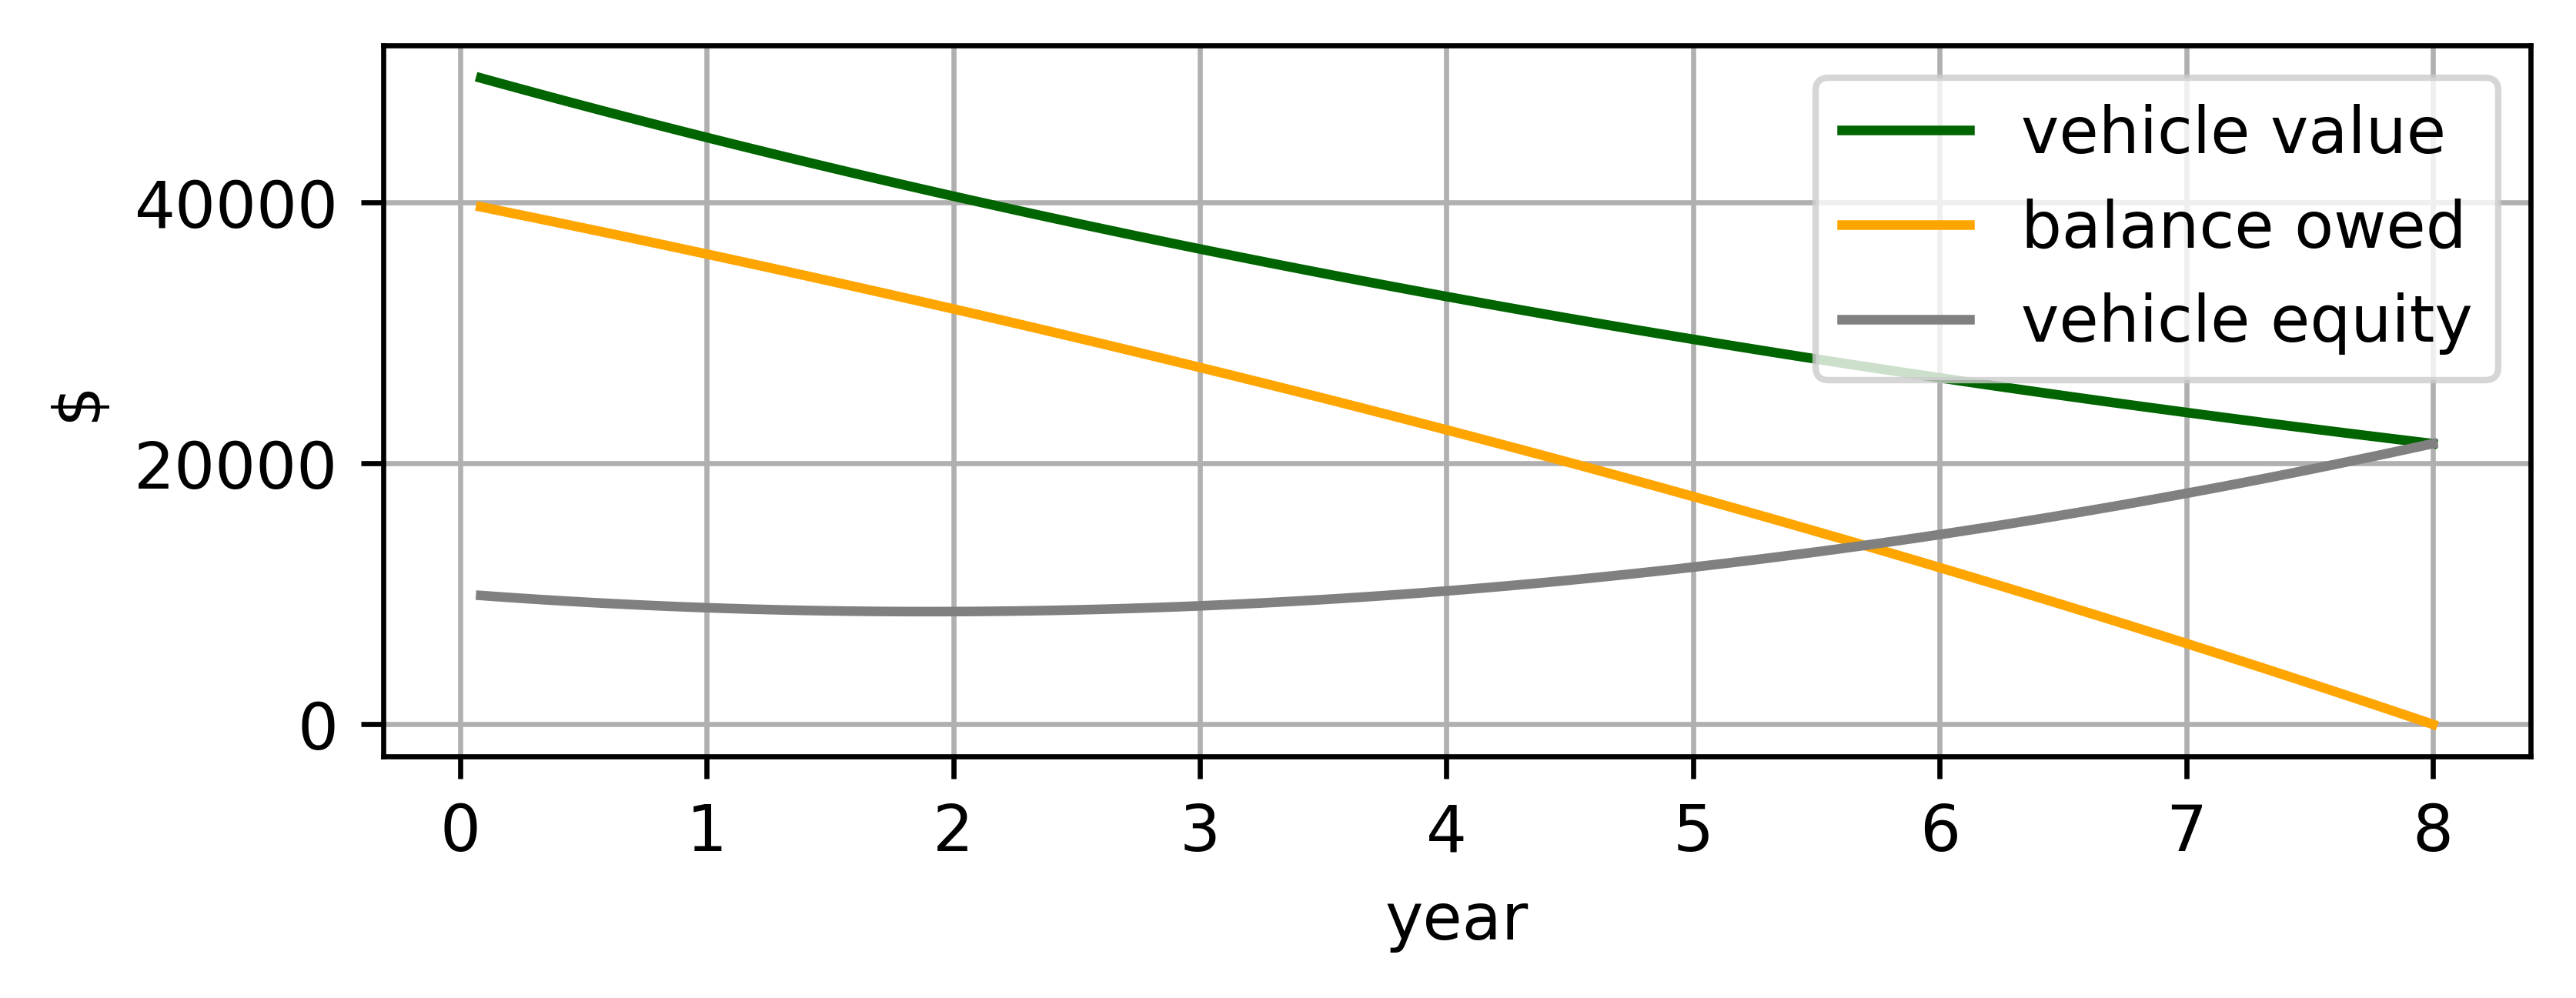

In [30]:
#%% plot amortization

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
fig = plt.figure(figsize=(6,2))   # initialize figure
plt.rcParams.update({'font.size': 10})

plt.plot(time, V, color='darkgreen', label='vehicle value')
plt.plot(time, B, color='orange', label='balance owed')
plt.plot(time, E_finance, color='grey', label='vehicle equity')
plt.ylabel('$')
plt.xlabel('year')
plt.grid('on')
plt.legend()

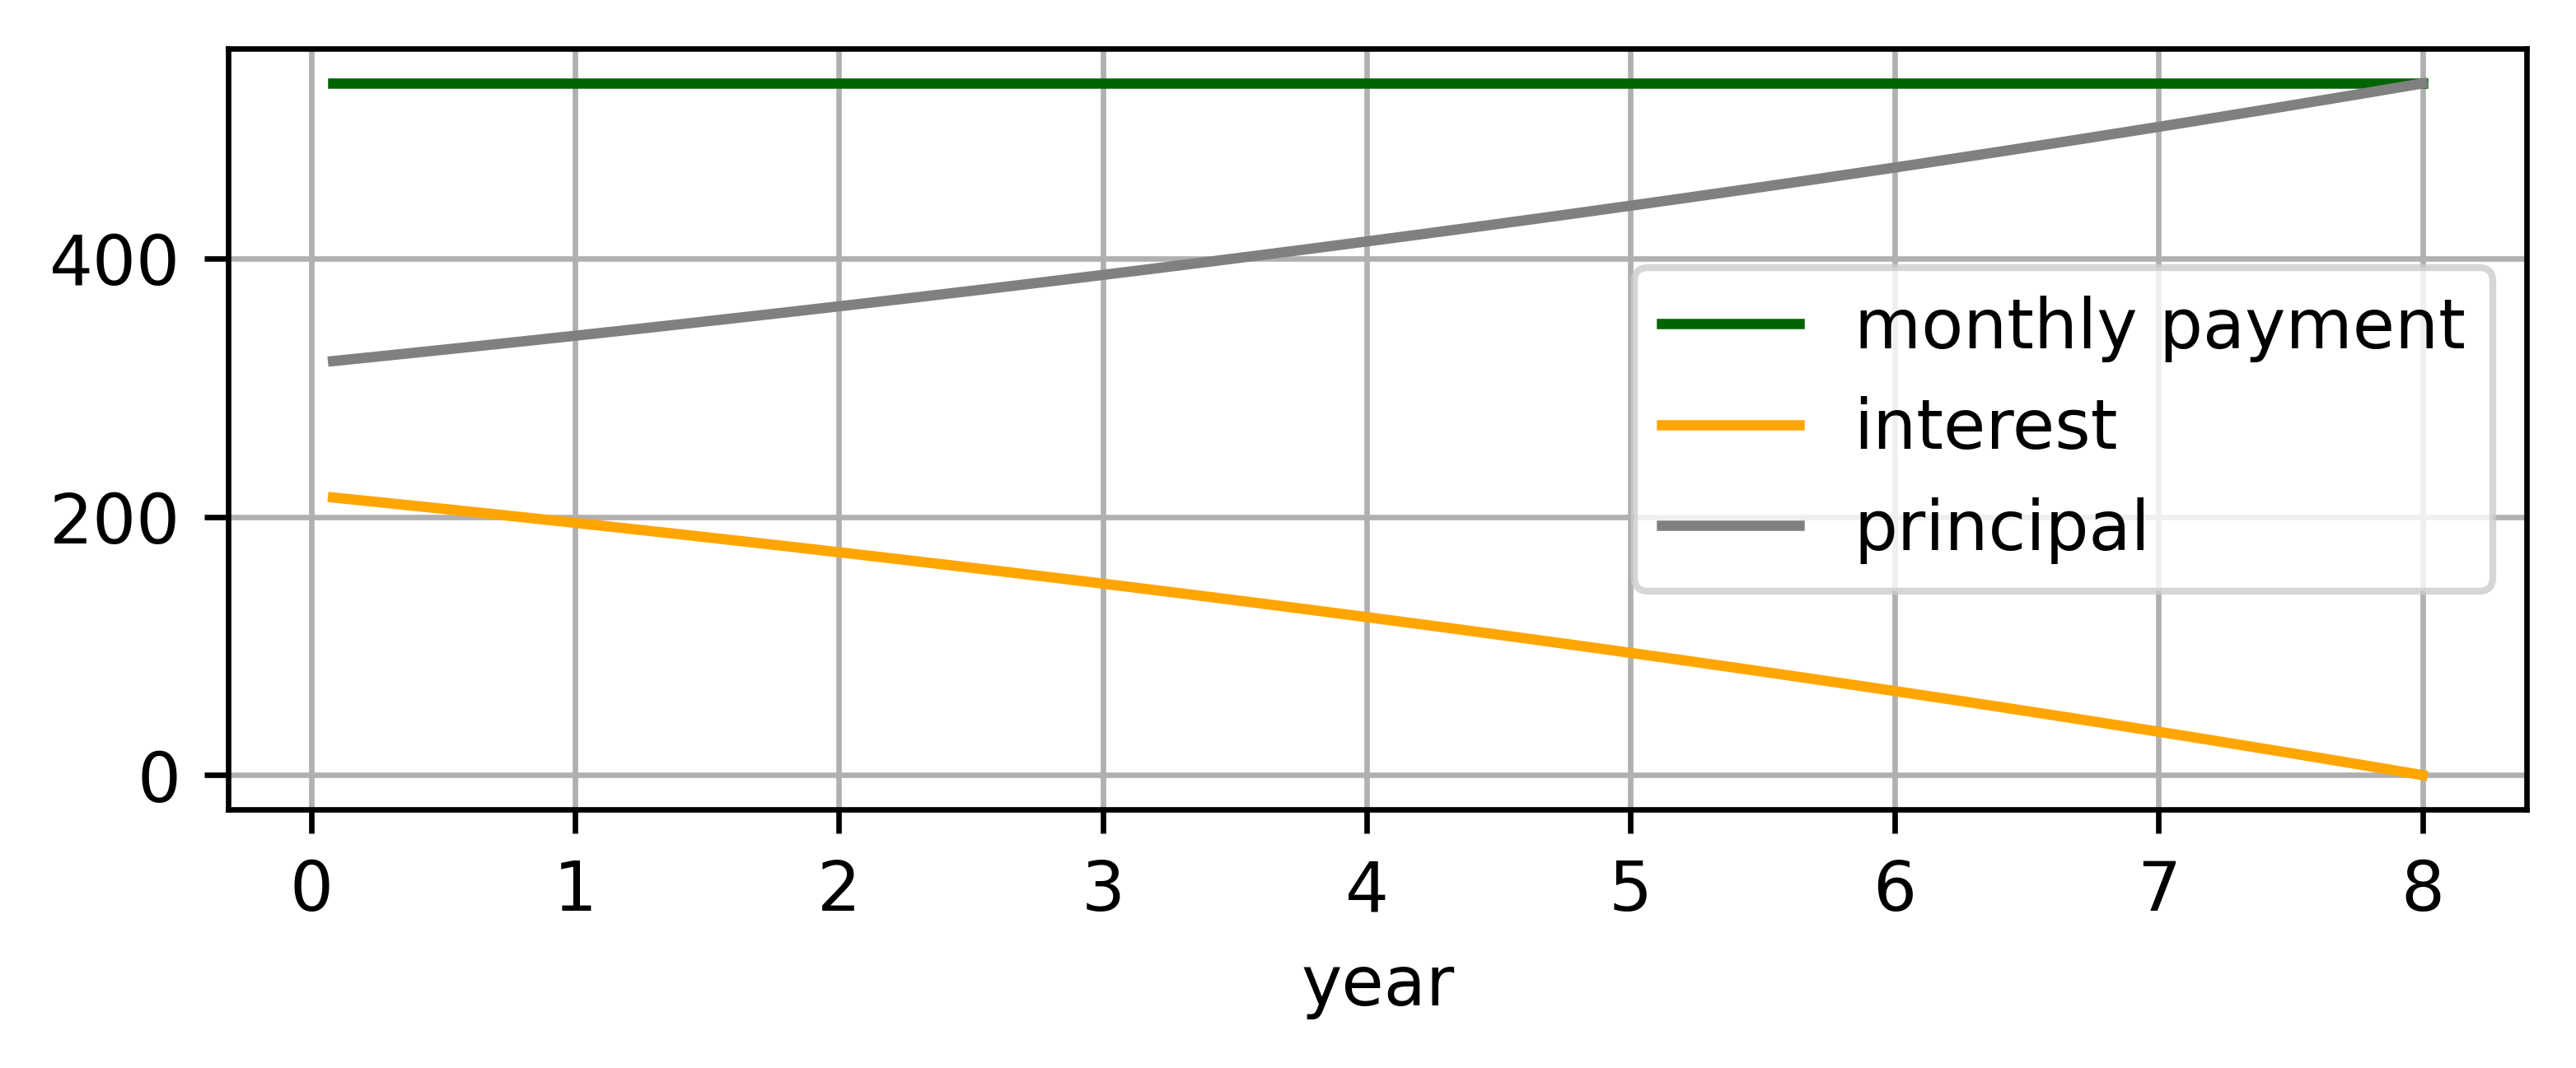

In [31]:
#%% plot amortization

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
fig = plt.figure(figsize=(6,2))   # initialize figure
plt.rcParams.update({'font.size': 10})

plt.plot(time, P*np.ones(time.size), color='darkgreen', label='monthly payment')
plt.plot(time, i/12*B, color='orange', label='interest')
plt.plot(time, P*np.ones(time.size) - i/12*B, color='grey', label='principal')
plt.xlabel('year')
plt.grid('on')
plt.legend()
